In [1]:
import pandas as pd
import geopandas as geopd
import matplotlib.pyplot as plt
from shapely.geometry import Point

In [7]:
import ast
def read_long(x):
    x = ast.literal_eval(x)
    return x['coordinates'][0]

In [8]:
def read_lat(x):
    x = ast.literal_eval(x)
    return x['coordinates'][1]

In [13]:
geo_tagged_tweets = pd.read_csv("Data/geo_tagged_tweets.csv")

In [14]:
len(geo_tagged_tweets)

28434

In [15]:
#create Point type for the inicdents in GEDELt incidents of interest
events_points = geo_tagged_tweets[["long","lat"]].apply(lambda x: Point(x['long'], x['lat']), axis = 1)

In [16]:
geo_tagged_tweets['points'] = events_points

In [17]:
geo_tagged_tweets_points = geopd.GeoDataFrame(geo_tagged_tweets, geometry='points')

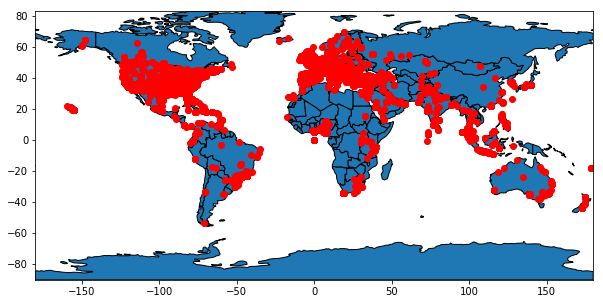

In [18]:
world = geopd.read_file(geopd.datasets.get_path('naturalearth_lowres'))
minx, miny, maxx, maxy = world.total_bounds
ax = world.plot(figsize=(10, 10),edgecolor='black')
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)
geo_tagged_tweets_points.plot(ax=ax, color='red')
plt.show()

In [19]:
turkey_shp = geopd.read_file("Data/istanbul_turkey.imposm-shapefiles/istanbul_turkey_osm_admin.shp")

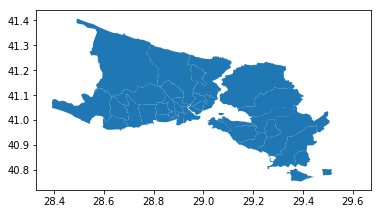

In [20]:
turkey_shp.plot()

In [21]:
minx, miny, maxx, maxy = turkey_shp.total_bounds

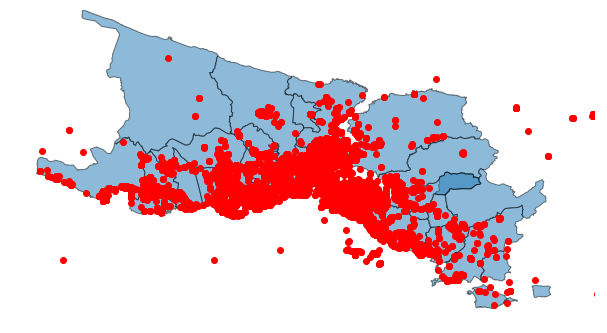

In [22]:
ax = turkey_shp.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)
geo_tagged_tweets_points.plot(ax=ax, color='red', alpha=1)
ax.set_axis_off()
plt.show()

In [27]:
turkey_shp[turkey_shp["id"] == 32].total_bounds

array([28.93901184, 41.02154715, 28.99579169, 41.06578373])

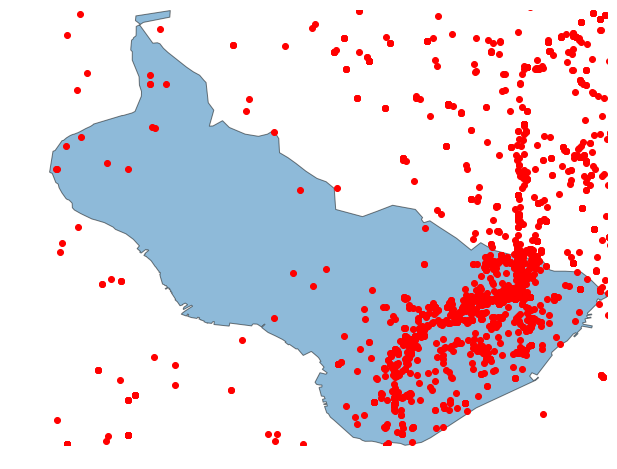

In [28]:
taksin_minx, taksim_miny, taksim_maxx, taksim_maxy = turkey_shp[turkey_shp["id"] == 32].total_bounds
ax = turkey_shp[turkey_shp["id"] == 32].plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
ax.set_xlim(taksin_minx, taksim_maxx)
ax.set_ylim(taksim_miny, taksim_maxy)
geo_tagged_tweets_points.plot(ax=ax, color='red', alpha=1)
ax.set_axis_off()
plt.show()

In [47]:
taksim.geometry

31    POLYGON ((28.93901184467745 41.04933432855222,...
Name: geometry, dtype: object

In [45]:
taksim = turkey_shp[turkey_shp["id"] == 32]

In [49]:
geo_tagged_tweets_points.crs = taksim.crs
taksim_tweets = geopd.sjoin(taksim, geo_tagged_tweets_points, how='inner', op='intersects')

In [50]:
len(taksim_tweets)

1423

In [54]:
taksim_tweets.to_csv("Data/tweets_merged_within_taksim_admin.csv")

In [57]:
taksim_tweets_points = geo_tagged_tweets_points[geo_tagged_tweets_points.id.isin(taksim_tweets.id_right.values)]

In [61]:
taksim_tweets_points.to_csv("Data/taksim_tweets_points.csv")

In [58]:
len(taksim_tweets_points)

1423

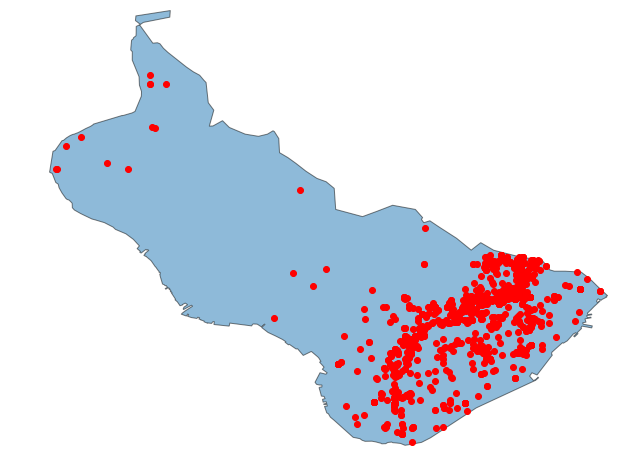

In [60]:
taksin_minx, taksim_miny, taksim_maxx, taksim_maxy = turkey_shp[turkey_shp["id"] == 32].total_bounds
ax = turkey_shp[turkey_shp["id"] == 32].plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
ax.set_xlim(taksin_minx, taksim_maxx)
ax.set_ylim(taksim_miny, taksim_maxy)
taksim_tweets_points.plot(ax=ax, color='red', alpha=1)
ax.set_axis_off()
plt.show()